In [ ]:
import os
print(os.getcwd())

# Создание data frame, проверка.

In [38]:
import pandas as pd

pd.set_option('display.max_rows', 1000)  # Отображать до 1000 строк
pd.set_option('display.max_columns', 50)  # Отображать до 50 столбцов

try:
    df1 = pd.read_csv('/Users/admin/Downloads/test_db/Anket.csv', delimiter=';')
    df2 = pd.read_csv('/Users/admin/Downloads/test_db/Payments.csv', delimiter=';')
    df3 = pd.read_csv('/Users/admin/Downloads/test_db/ML.csv', delimiter=';')
    print("Файлы загружены.")
except FileNotFoundError as e:
    print(f"Файл не найден {e}")
    raise
except Exception as e:
    print(f"Ошибка при загрузке файлов: {e}")
    raise
try:
    merged_df = pd.merge(df1, df2, on='DraftId', how='outer')
    merged_df = pd.merge(merged_df, df3, on='DraftId', how='outer')
    print("Файлы объединены.")
except KeyError as e:
    print(f"Столбец с уникальным ID не найден: {e}")
    raise
except Exception as e:
    print(f"Ошибка при объединении данных: {e}")
    raise

print(df1.head())
print(df2.head())
print(df3.head())
print(df1.shape)
print(df2.shape)
print(df3.shape)

print(f"Количество строк: {merged_df.shape[0]}")
print(f"Количество столбцов: {merged_df.shape[1]}")

Файлы загружены.
Файлы объединены.
   Unnamed: 0                               DraftId  formula_id  flagFC  \
0           0  3ac9e896-80a7-4d07-af43-a3b775b30739          55       1   
1           4  f76f3e80-946e-46df-9db6-795d112e63b4          54       1   
2           7  187b4bf8-f41c-4a6d-8e27-dc39bc449b90          55       1   
3          20  6df8c019-7172-4733-bab1-51d2400e0ec5          55       1   
4          23  d160dd00-075b-4e5a-a106-9704d3458261          55       1   

   flagEF  flagCKB  Amount    ActivityType            Education  Gender  \
0       1        0  6000.0        торговля               высшее       2   
1       1        0  6000.0             NaN  среднее специальное       1   
2       1        0  5000.0          другое  среднее специальное       1   
3       1        0  6600.0        торговля              среднее       2   
4       1        0  6000.0  промышленность  среднее специальное       1   

              LoanPurpose  MaritalStatus  MonthlyIncome  \
0  н

# Проверка пустых значений

In [103]:
# Проверка пустых значений
print(merged_df.isnull().sum())

Unnamed: 0                                    0
DraftId                                       0
formula_id                                    0
flagFC                                        0
flagEF                                        0
flagCKB                                       0
Amount                                        0
ActivityType                              16507
Education                                   155
Gender                                        0
LoanPurpose                                 155
MaritalStatus                                 0
MonthlyIncome                                 0
Post                                      16356
ApprovalCreateTime                            0
ApprovalAmount                                0
RequestAmount                                 0
FormulaId                                     0
Answer                                        0
LoanAmount                               140569
IssueDate                               

# Процент пропущенных значений

In [ ]:
# Процент пропущенных значений по столбцам
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
print(missing_percentage[missing_percentage > 0])

# Описательаная статистика

In [105]:
# Описательаная статистика по столбцам
print(merged_df.describe())

          Unnamed: 0     formula_id         flagFC         flagEF   flagCKB  \
count  181977.000000  181977.000000  181977.000000  181977.000000  181977.0   
mean   253630.329212      54.324541       0.931030       0.987564       0.0   
min         0.000000      30.000000       0.000000       0.000000       0.0   
25%    126936.000000      54.000000       1.000000       1.000000       0.0   
50%    253376.000000      55.000000       1.000000       1.000000       0.0   
75%    380746.000000      55.000000       1.000000       1.000000       0.0   
max    507246.000000      60.000000       1.000000       1.000000       0.0   
std    146333.136523       1.676796       0.253404       0.110820       0.0   

              Amount         Gender  MaritalStatus   MonthlyIncome  \
count  181977.000000  181977.000000  181977.000000   181977.000000   
mean     5336.816741       1.422097       0.984223    44538.553979   
min      2000.000000       1.000000       0.000000        0.000000   
25%     

# Графики на случайной выборке

In [6]:
# Графики на основе случайной выборки данных

import matplotlib.pyplot as plt
import seaborn as sns

# Случайная выборка из 10,000 строк
sample_df = merged_df.sample(n=10000, random_state=1)

# Для числовых столбцов
numerical_columns = sample_df.select_dtypes(include=['int64', 'float64']).columns
num_to_plot = min(10, len(numerical_columns))  # Показываем максимум 10 графиков

for i, column in enumerate(numerical_columns[:num_to_plot]):
    plt.figure(figsize=(10, 5))
    sample_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.savefig(f'histogram_{column}.png')  
    plt.close()  # Очистка памяти

# Для категориальных
categorical_columns = sample_df.select_dtypes(include=['object']).columns
cat_to_plot = min(10, len(categorical_columns))  # Показываем максимум 10 графиков

for i, column in enumerate(categorical_columns[:cat_to_plot]):
    plt.figure(figsize=(10, 5))
    sns.countplot(y=sample_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.savefig(f'distribution_{column}.png')  # Сохранение графика
    plt.close()  # Очистка памяти

![](distribution_ActivityType.png)
![](distribution_Answer.png)
![](distribution_Education.png)
![](distribution_LoanPurpose.png)
![](distribution_LoanStatus.png)
![](distribution_Post.png)
![](histogram_Amount.png)
![](histogram_ApprovalAmount.png)
![](histogram_Gender.png)
![](histogram_MaritalStatus.png)

In [7]:
# Разреженные графики для кучи Y-координат
date_columns = ['ApprovalCreateTime', 'IssueDate', 'RetireDate']
for column in date_columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(y=sample_df[column])
    
    step = len(sample_df[column].unique()) // 20  # Plot fewer labels if too many unique values
    ax.set_yticks(ax.get_yticks()[::step])
    
    plt.yticks(rotation=0)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.savefig(f'distribution_{column}.png')
    plt.close()

# Распределение зарплат с отсечением в 300 тыс. р.

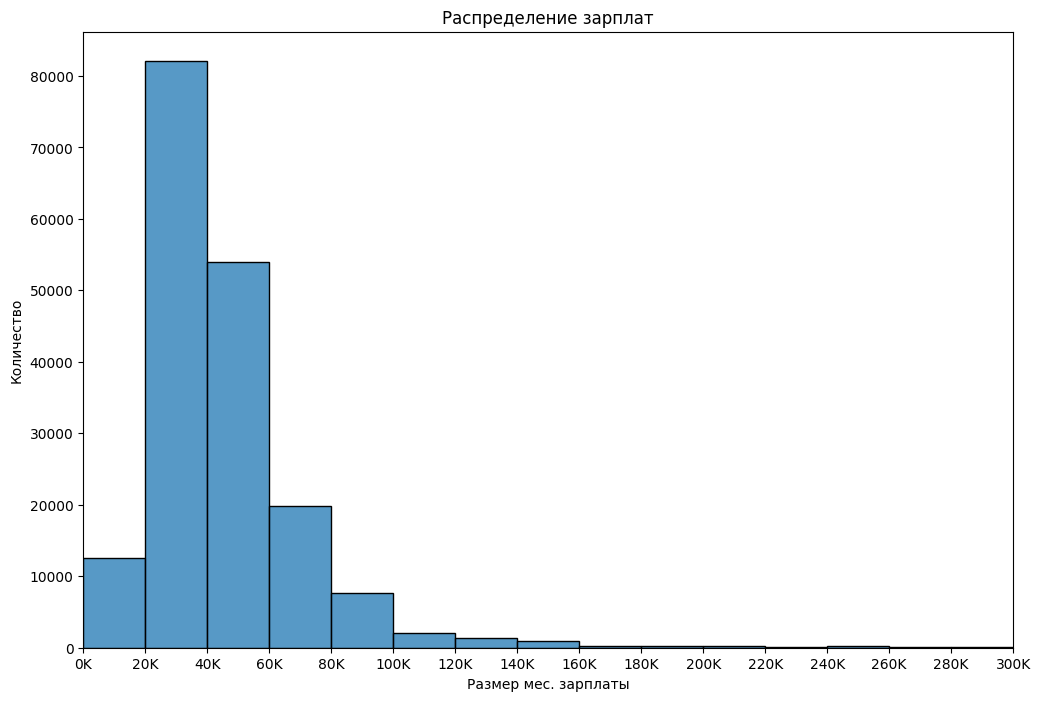

In [92]:
plt.figure(figsize=(12, 8))

sns.histplot(merged_df['MonthlyIncome'], bins=50, kde=False)

plt.title('Распределение зарплат')
plt.xlabel('Размер мес. зарплаты')
plt.ylabel('Количество')

plt.xlim(0, 300000)

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000):,}K'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20000))

plt.show()

# Число выданных кредитов

In [10]:
# График — число выданных кредитов, группировка по месяцам

sample_df['IssueDate'] = pd.to_datetime(sample_df['IssueDate'], errors='coerce')

sample_df['IssueMonth'] = sample_df['IssueDate'].dt.to_period('M')

monthly_counts = sample_df.groupby('IssueMonth').size()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Количество выданных кредитов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество выданных кредитов')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('credits_issued_per_month.png')
plt.close()

![credits_issued_per_month](credits_issued_per_month.png)

# Корреляции для переменных с коэффициентов корр. >=|0.4|

## (Ничего интересного)

Корреляции по модулю больше 0.4:
                               Education_неполное высшее  Education_среднее  \
Education_неполное высшее                            NaN                NaN   
Education_среднее                                    NaN                NaN   
Education_среднее специальное                  -0.305087           -0.41768   
Post_рабочий                                         NaN                NaN   
Post_служащий / специалист                           NaN                NaN   
Answer_Отказ                                         NaN                NaN   
LoanStatus_Просрочен                                 NaN                NaN   

                               Education_среднее специальное  Post_рабочий  \
Education_неполное высшее                          -0.305087           NaN   
Education_среднее                                  -0.417680           NaN   
Education_среднее специальное                            NaN           NaN   
Post_рабочий          

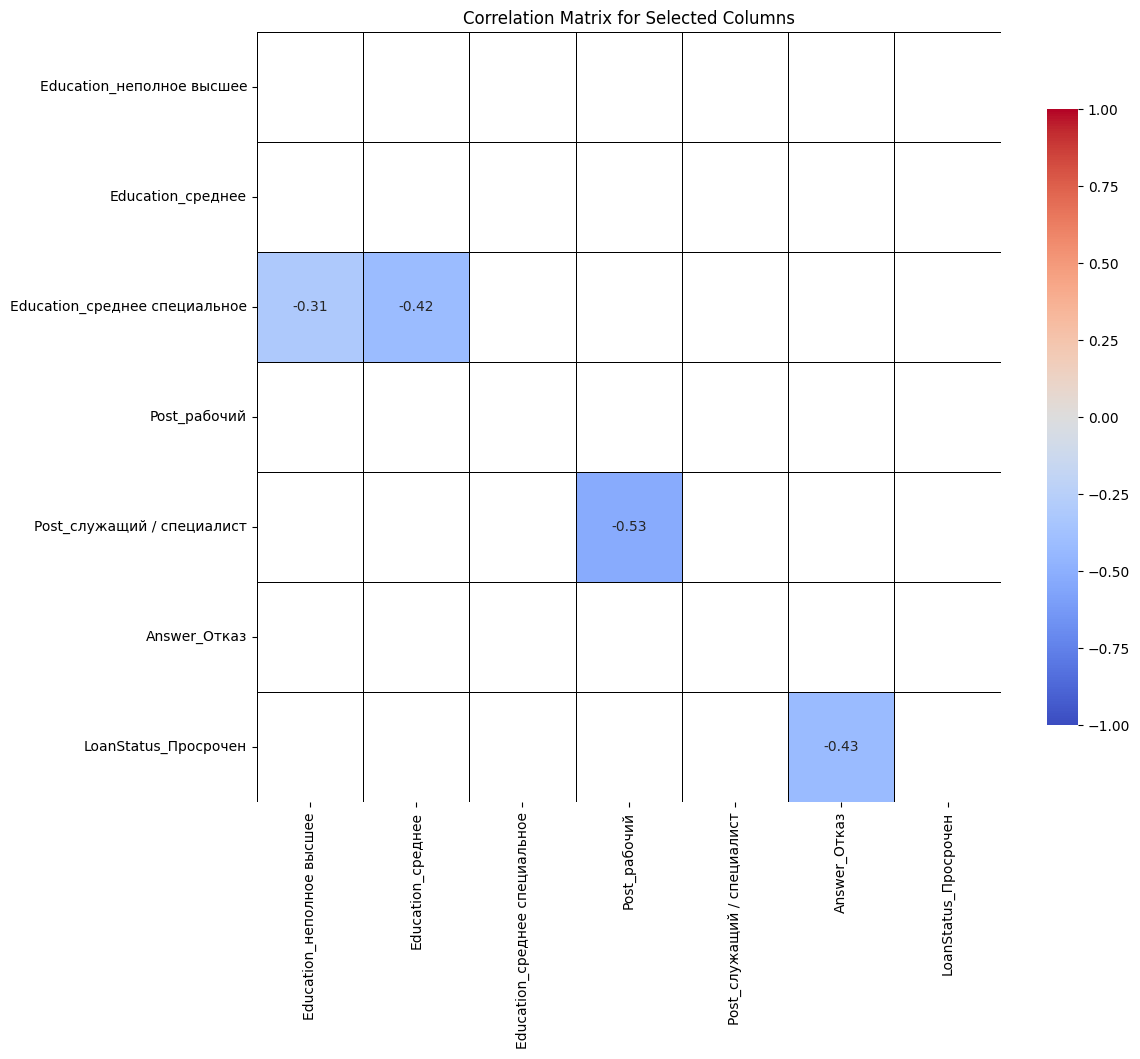

In [79]:
import numpy as np

# Определяем столбцы для анализа
predictors = ['Gender', 'Education', 'LoanPurpose', 'MaritalStatus', 'MonthlyIncome', 'Post']
targets = ['LoanAmount', 'Answer', 'Duration', 'LoanStatus']

# Объединяем предсказатели и цели
selected_columns = predictors + targets

# Выбираем только нужные столбцы
subset_df = merged_df[selected_columns]

# Преобразуем категориальные данные в числовые с помощью one-hot кодирования
encoded_df = pd.get_dummies(subset_df, drop_first=True)

# Вычисляем матрицу корреляций
corr_matrix = encoded_df.corr()

# Фильтруем корреляции, чтобы оставить только те, которые больше 0.4 или меньше -0.4
filtered_corr_matrix = corr_matrix[(abs(corr_matrix) > 0.3) & (abs(corr_matrix) < 1)]

# Убираем строки и столбцы, где все значения NaN
filtered_corr_matrix = filtered_corr_matrix.dropna(how='all')
filtered_corr_matrix = filtered_corr_matrix.dropna(axis=1, how='all')

# Выводим значения корреляций, которые больше 0.4 по модулю
print("Корреляции по модулю больше 0.4:")
print(filtered_corr_matrix)

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Создаем тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, mask=mask, linewidths=0.5, linecolor='black', cbar_kws={'shrink': .8})

# Настраиваем отображение значений
plt.title('Correlation Matrix for Selected Columns')
plt.show()

# Линейные регрессии

## (Числовые слабые!)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

predictors = ['Gender', 'Education', 'LoanPurpose', 'MaritalStatus', 'MonthlyIncome', 'Post']
targets = ['LoanAmount', 'Answer', 'Duration', 'LoanStatus']

subset_df = merged_df[predictors + targets]

# категориальные в числовые
encoded_df = pd.get_dummies(subset_df, drop_first=True)

# Заполнение пропущенных значений ср. арифм.
numerical_columns = ['MonthlyIncome', 'LoanAmount', 'Duration']
imputer_num = SimpleImputer(strategy='mean')
encoded_df[numerical_columns] = imputer_num.fit_transform(encoded_df[numerical_columns])

# Заполнение пропущенных значений модой
imputer_cat = SimpleImputer(strategy='most_frequent')
categorical_columns = [col for col in encoded_df.columns if col not in numerical_columns]
encoded_df[categorical_columns] = imputer_cat.fit_transform(encoded_df[categorical_columns])

binary_targets = [col for col in encoded_df.columns if col.startswith('Answer_') or col.startswith('LoanStatus_')]

for target in binary_targets:
    X = encoded_df.drop(columns=[target])
    y = encoded_df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"Target: {target}")
    print(classification_report(y_test, y_pred))
    print()


numerical_targets = [col for col in encoded_df.columns if col in numerical_columns]

for target in numerical_targets:
    X = encoded_df.drop(columns=[target])
    y = encoded_df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Target: {target}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print()

Target: Answer_Отказ
              precision    recall  f1-score   support

         0.0       0.96      0.26      0.41     10612
         1.0       0.77      1.00      0.87     25784

    accuracy                           0.78     36396
   macro avg       0.86      0.63      0.64     36396
weighted avg       0.82      0.78      0.73     36396


Target: LoanStatus_Просрочен
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     33854
         1.0       0.57      0.00      0.00      2542

    accuracy                           0.93     36396
   macro avg       0.75      0.50      0.48     36396
weighted avg       0.91      0.93      0.90     36396


Target: MonthlyIncome
Mean Squared Error: 1351616643.76
R^2 Score: 0.10

Target: LoanAmount
Mean Squared Error: 397732.05
R^2 Score: 0.06

Target: Duration
Mean Squared Error: 11.98
R^2 Score: 0.06



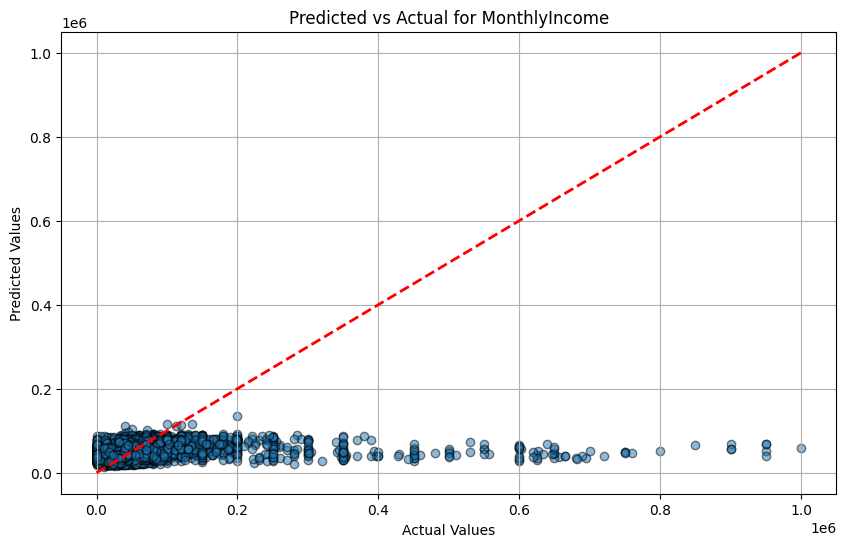

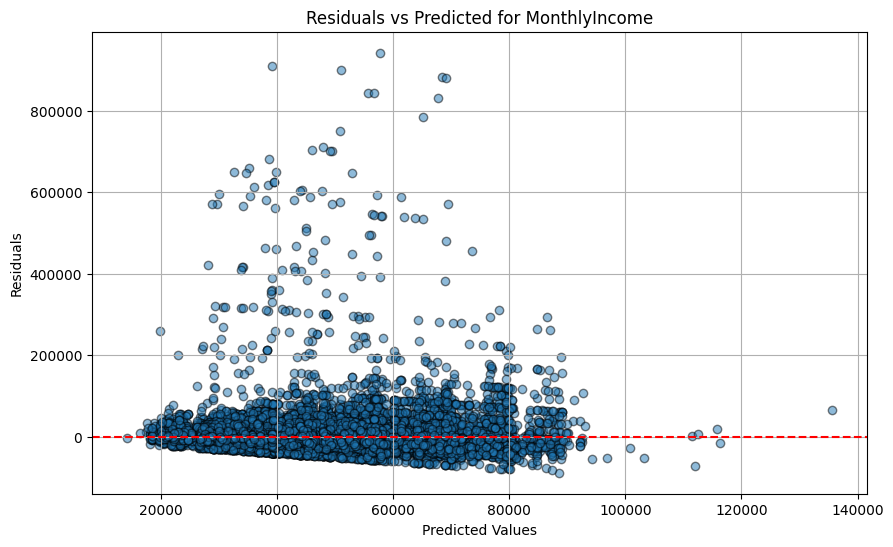

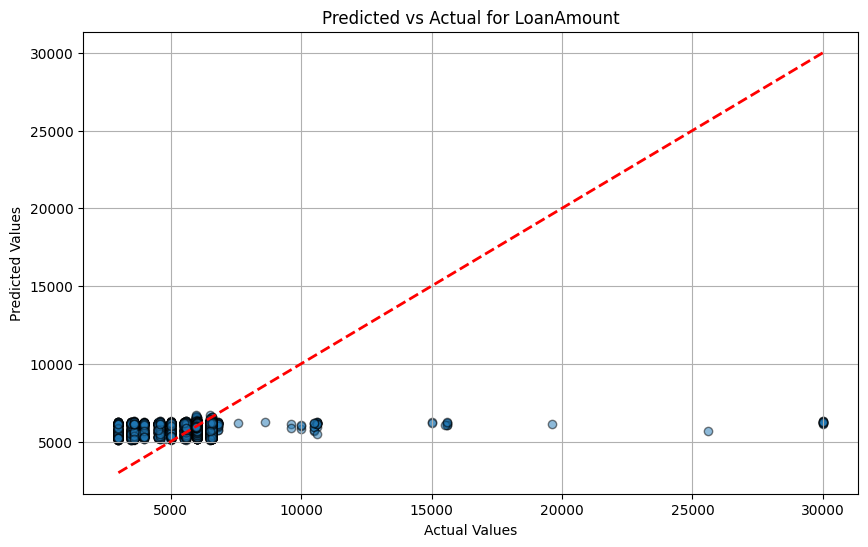

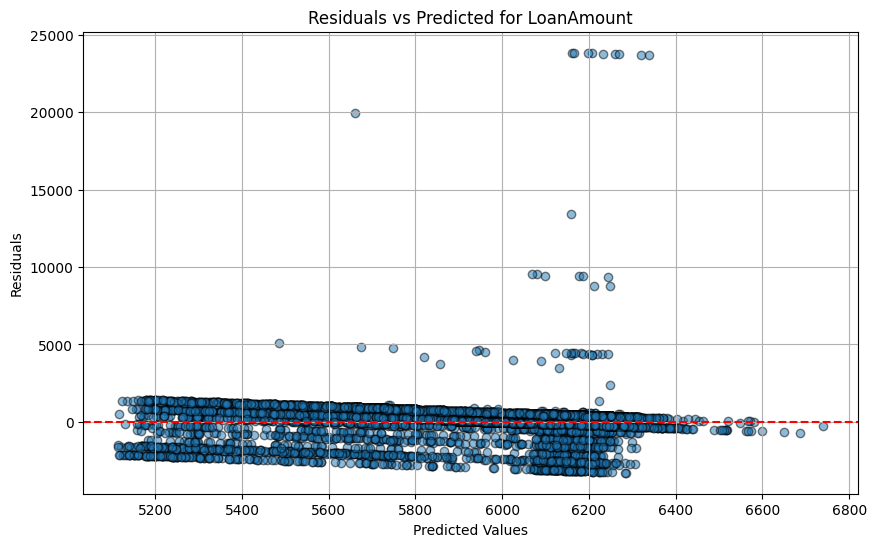

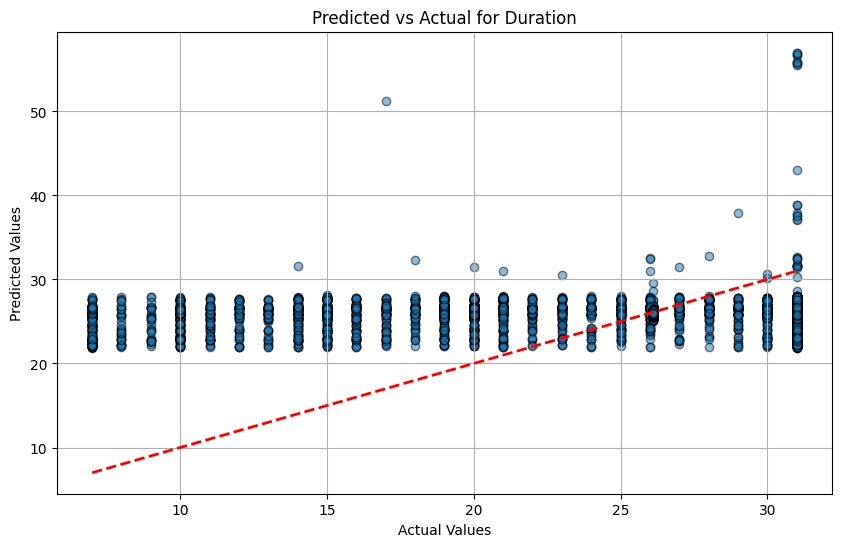

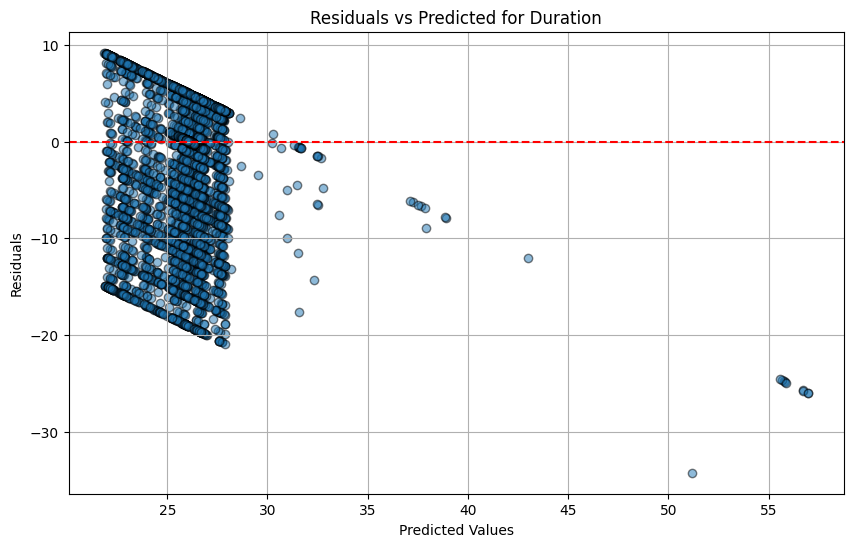

In [101]:
def plot_predicted_vs_actual(y_true, y_pred, title='Predicted vs Actual'):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Функция для построения графика Residuals vs Predicted
def plot_residuals_vs_predicted(y_true, y_pred, title='Residuals vs Predicted'):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5, edgecolors='k')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Визуализация для каждой числовой целевой переменной
for target, data in results.items():
    plot_predicted_vs_actual(data['y_test'], data['y_pred'], title=f'Predicted vs Actual for {target}')
    plot_residuals_vs_predicted(data['y_test'], data['y_pred'], title=f'Residuals vs Predicted for {target}')